In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

In [46]:
#generating a dataset with 300 samples, 2 centres and 2 features
X,y =make_blobs(n_samples=3000,centers=2,n_features=2,random_state=42,cluster_std=1.0)

In [47]:
X

array([[-2.20537903,  9.73584863],
       [ 5.03567768,  2.2367205 ],
       [-2.70155859,  9.31583347],
       ...,
       [ 4.0117351 ,  2.07210347],
       [ 3.79344453,  2.89884189],
       [ 2.54957594,  1.80291144]])

In [48]:
y

array([0, 1, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Synthetic data with 3 clusters')

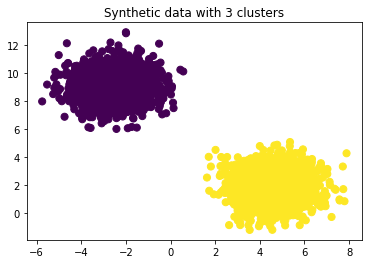

In [49]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=50)
plt.title("Synthetic data with 3 clusters")

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [52]:
len(X_train)

2100

In [53]:
knn_clean=KNeighborsClassifier(n_neighbors=5)
knn_clean.fit(X_train,y_train)
y_pred_clean=knn_clean.predict(X_test)

In [54]:
accuracy_clean=accuracy_score(y_test,y_pred_clean)
accuracy_clean

1.0

In [56]:
#Introduce some outliers in my data
np.random.seed(42)
n_outliers=500
X_outliers=np.random.uniform(low=-10,high=10,size=(n_outliers,2))

In [57]:
X_outliers

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959],
       [-8.83832776,  7.32352292],
       [ 2.02230023,  4.16145156],
       [-9.58831011,  9.39819704],
       [ 6.64885282, -5.75321779],
       [-6.36350066, -6.3319098 ],
       [-3.91515514,  0.49512863],
       [-1.36109963, -4.1754172 ],
       [ 2.23705789, -7.21012279],
       [-4.15710703, -2.67276313],
       [-0.87860032,  5.70351923],
       [-6.00652436,  0.28468877],
       [ 1.84829138, -9.07099175],
       [ 2.15089704, -6.58951753],
       [-8.69896814,  8.97771075],
       [ 9.31264066,  6.16794696],
       [-3.90772462, -8.04655772],
       [ 3.68466053, -1.19695013],
       [-7.5592353 , -0.0964618 ],
       [-9.31222958,  8.18640804],
       [-4.82440037,  3.25044569],
       [-3.76577848,  0.40136042],
       [ 0.93420559, -6.30291089],
       [ 9.39169256,  5.50265647],
       [ 8.78997883,  7.89654701],
       [ 1.95799958,  8.4374847 ],
       [-8.23014996,

In [58]:
y_outliers=np.random.choice([0,1],size=n_outliers)
y_outliers

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [59]:
X_train_outliers=np.vstack([X_train,X_outliers])
len(X_train_outliers)

2600

In [60]:
y_train_outliers=np.hstack([y_train,y_outliers])
y_train_outliers

array([1, 0, 1, ..., 1, 0, 1])

In [61]:
len(y_train_outliers)

2600

Text(0.5, 1.0, 'Synthetic data with 3 clusters withoutliers')

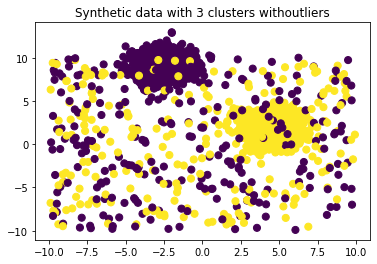

In [62]:
plt.scatter(X_train_outliers[:,0],X_train_outliers[:,1],c=y_train_outliers,cmap='viridis',s=50)
plt.title("Synthetic data with 3 clusters withoutliers")

In [67]:
#Train KNN on data with outliers
knn_outliers=KNeighborsClassifier(n_neighbors=5)
knn_outliers.fit(X_train_outliers,y_train_outliers)
y_pred_outliers=knn_outliers.predict(X_test)

In [68]:
accuracy_outliers=accuracy_score(y_test,y_pred_outliers)
accuracy_outliers

0.9977777777777778